In [1]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [2]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


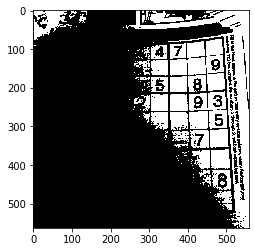

97.0


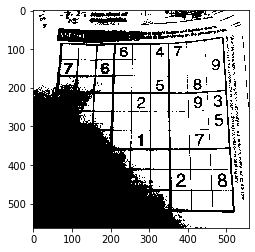

In [11]:
img = cv2.imread('sudoku.jpg', 0)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
imshow("", binary)

t, binary2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(t)
imshow("", binary2)

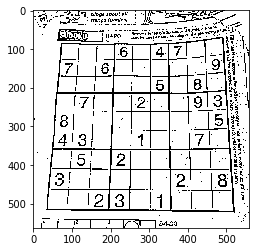

In [15]:
binary3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)

imshow("", binary3)

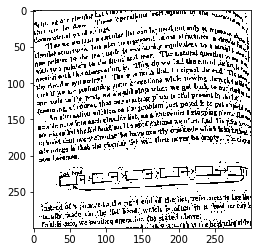

In [18]:
img = cv2.imread('text.jpg', 0)
binary4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)
imshow("", binary4)

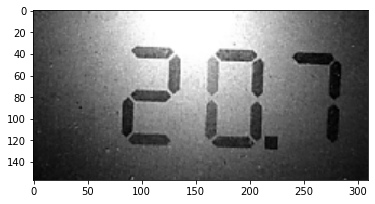

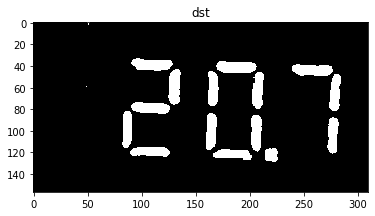

In [63]:
src = cv2.imread('207.png', cv2.IMREAD_GRAYSCALE)
imshow("", src)
src = cv2.GaussianBlur(src, (13, 13), 0)
dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY | cv2.THRESH_BINARY_INV, 21, 5)
imshow('dst', dst)

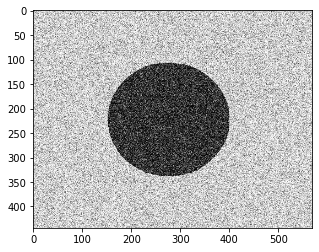

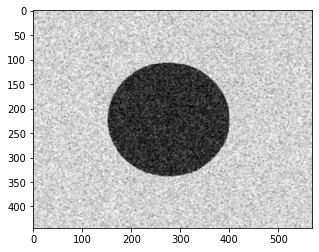

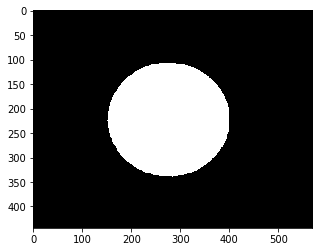

In [54]:
image = cv2.imread('circle.png',0)  
imshow("", image)
img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow("", img_blur)
_,binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
imshow("", binary)

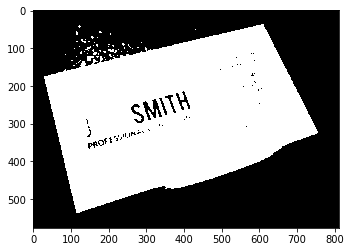

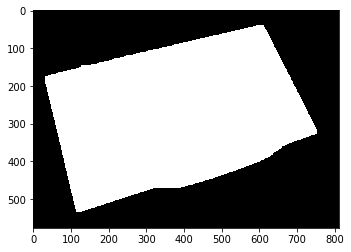

In [69]:
img = cv2.imread('namecard.png', 0)
gray = cv2.GaussianBlur(img, (7, 7), 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)

imshow("", binary )
open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=10)

imshow("", closed)

In [5]:
cap = cv2.VideoCapture('car-overhead-1.avi')

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)    
    
    cv2.imshow('mask',fgmask)
    cv2.imshow('src',frame)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

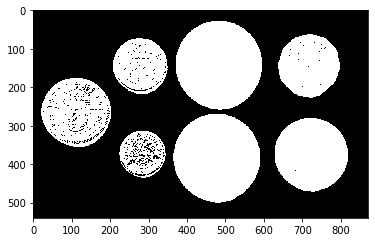

In [8]:
img  = cv2.imread("coins2.png", 0)
_, img_edge = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
imshow("", img_edge)

In [10]:
nb_components, output, stats, centroids = 
cv2.connectedComponentsWithStats(img_edge, connectivity=8)

In [14]:
print(nb_components)
print(centroids)
print(output.shape)
print(stats.shape)
print(stats[1])

17
[[413.22645895 273.70274529]
 [483.14108923 142.07304916]
 [717.06125975 143.86770659]
 [278.57624576 143.8939473 ]
 [111.24864818 264.07462041]
 [107.         269.5       ]
 [477.62316095 383.23852286]
 [ 48.         273.        ]
 [722.9926831  374.55755496]
 [107.         284.5       ]
 [283.79082529 371.72431958]
 [258.         393.        ]
 [260.         394.        ]
 [255.         420.        ]
 [309.         422.        ]
 [304.         424.        ]
 [287.         428.        ]]
(540, 871)
(17, 5)
[  371    28   225   231 40726]


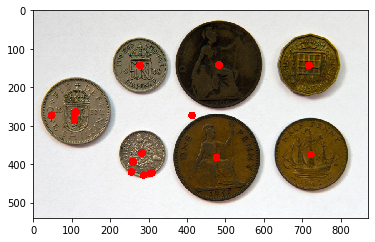

In [15]:
img  = cv2.imread("coins2.png")

for c in centroids :    
    cv2.circle(img, (int(c[0]), int(c[1])), 10, (0,0,255), -1)

imshow("", img)    

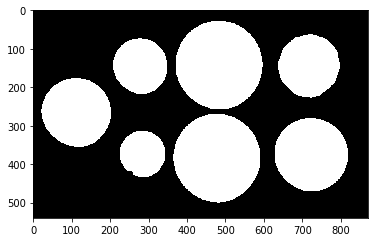

8


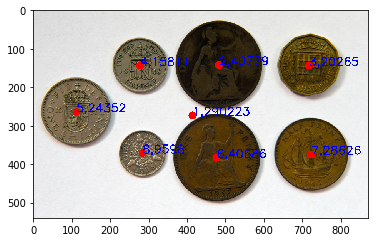

In [43]:
img  = cv2.imread("coins2.png", 0)
img = cv2.GaussianBlur(img, (7,7), 0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

imshow("", binary)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img_edge, connectivity=8)

print(nb_components)

img  = cv2.imread("coins2.png")

font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX  

i = 1
for c in centroids :    
    cv2.circle(img, (int(c[0]), int(c[1])), 10, (0,0,255), -1)
    cv2.putText(img, f"{i},{stats[i-1][4]}", 
                (int(c[0]), int(c[1])), font, 1.0, (255,0,0), 2)
    i += 1
    
imshow("", img)    

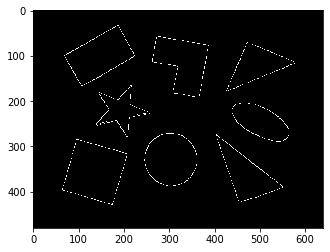

In [73]:
import math
#src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('polygon.bmp', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(src, 50, 150)

imshow("", edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

In [74]:
print(type(lines))
print(lines.shape)
print(lines[0,0,:])   #180, 309   ~  737, 72
print(lines[1,0,:])   # 329, 398  ~  385, 388

<class 'numpy.ndarray'>
(28, 1, 4)
[405 274 551 388]
[427 177 472  71]


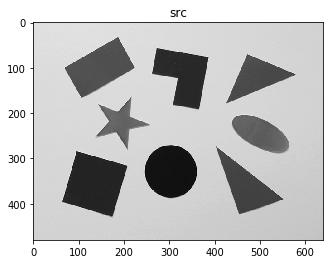

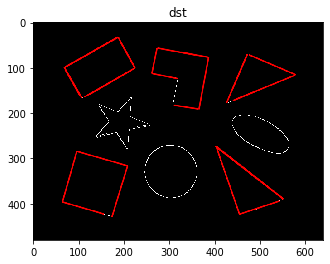

True

In [75]:
for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])
    cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)
cv2.imwrite("output.png", dst)

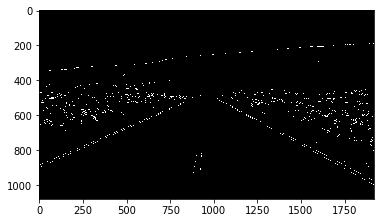

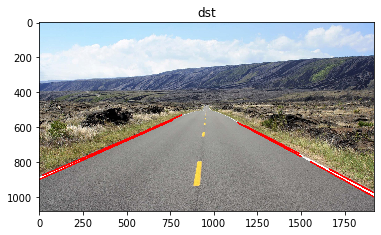

In [87]:
import math
src = cv2.imread('lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (11, 11), 0)
edge = cv2.Canny(src, 60, 150)

imshow("", edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

src = cv2.imread('lane.jpg')

for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])
    cv2.line(src, pt1, pt2, (0, 0, 255), 7, cv2.LINE_AA)
imshow('dst', src)    